<a href="https://colab.research.google.com/github/Dih08/Q-learning/blob/main/QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este código implementa o algoritmo de aprendizado por reforço Q-Learning para encontrar o melhor caminho em um ambiente definido por estados e ações. Ele utiliza uma matriz de recompensas para guiar o agente através de diversos estados até alcançar o estado objetivo. Durante o treinamento, o agente aprende a maximizar a recompensa total ao longo do tempo, atualizando uma matriz Q que representa o valor esperado de realizar uma ação em um estado específico. Após o treinamento, é possível identificar o melhor caminho a partir de um estado inicial usando a matriz Q treinada.

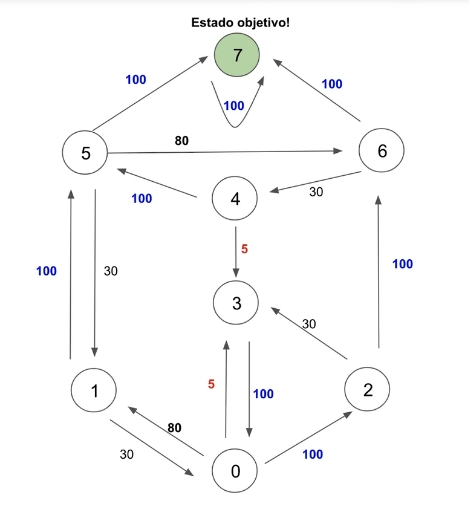

In [ ]:
import numpy as np
import pandas as pd


numpy: Biblioteca para operações numéricas e manipulação de matrizes.

pandas: Biblioteca para manipulação e análise de dados, usada para exibir a matriz Q normalizada.

In [ ]:
#definindo estado e ações a sera, tomadas

states = [0,1,2,3,4,5,6,7]
actions = [0,1,2,3,4,5,6,7]

#parametro gamma
alpha = 0.1
gamma = 0.8
goal_state = 7
episodios = 100
max_passos_por_episodio = 20
epsilon = 0.05




states: Lista que representa os estados possíveis no ambiente.

actions: Lista que representa as ações possíveis (movimentos entre estados).

goal_state: Estado objetivo que o agente deve alcançar.

gamma: Fator de desconto que controla a importância das recompensas futuras.

alpha: Taxa de aprendizado que determina a atualização dos valores Q.

O valor de epsilon define a probabilidade de exploração. Diminuir epsilon reduz ações aleatórias e acelera o foco em caminhos conhecidos:

In [ ]:
# Define a matriz de recompensas R
R = [
    [-1, 80, 5, 100, -1, -1, -1, -1],
    [30, -1, 1, 80, 100, -1, -1, -1],
    [100, -1, -1, -1, -1, 1, -1, -1],
    [-1, 5, -1, -1, -1, 100, -1, -1],
    [-1, 30, -1, -1, -1, -1, 100, -1],
    [-1, -1, 1, -1, -1, -1, -1, 100],
    [-1, -1, -1, -1, -1, -1, -1, 100],
    [-1, -1, -1, -1, -1, -1, -1, 100]
]

R = np.array(R)

# Exibe a matriz de recompensas como DataFrame
print("Reward matrix: Matriz de recompensas")
df_R = pd.DataFrame(
    R,
    index=['state_' + str(i) for i in range(R.shape[0])],
    columns=['state_' + str(i) for i in range(R.shape[1])]
)
print(df_R)



Reward matrix: Matriz de recompensas
         state_0  state_1  state_2  state_3  state_4  state_5  state_6  \
state_0       -1       80        5      100       -1       -1       -1   
state_1       30       -1        1       80      100       -1       -1   
state_2      100       -1       -1       -1       -1        1       -1   
state_3       -1        5       -1       -1       -1      100       -1   
state_4       -1       30       -1       -1       -1       -1      100   
state_5       -1       -1        1       -1       -1       -1       -1   
state_6       -1       -1       -1       -1       -1       -1       -1   
state_7       -1       -1       -1       -1       -1       -1       -1   

         state_7  
state_0       -1  
state_1       -1  
state_2       -1  
state_3       -1  
state_4       -1  
state_5      100  
state_6      100  
state_7      100  


R: Matriz de recompensas que define os valores das transições entre estados. Um valor de -1 indica uma transição inválida, enquanto valores positivos representam recompensas.

In [ ]:
#Inicializando a matriz 0 -zerada
Q = np.zeros((len(states), len(actions)))
print('Q-matrix')
print(pd.DataFrame(Q, index=['state_'+str(i) for i in range(Q.shape[0])],
                   columns=['state_' +str(i) for i in range(Q.shape[0])],))

Q-matrix
         state_0  state_1  state_2  state_3  state_4  state_5  state_6  \
state_0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_1      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_2      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_3      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_4      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_5      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_6      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
state_7      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

         state_7  
state_0      0.0  
state_1      0.0  
state_2      0.0  
state_3      0.0  
state_4      0.0  
state_5      0.0  
state_6      0.0  
state_7      0.0  


Q: Matriz Q, inicializada com zeros, usada para armazenar os valores Q durante o treinamento.

Atualmente, a matriz Q começa como zeros, o que exige muitas iterações para aprender valores. Uma inicialização mais informada pode acelerar a convergência:

In [ ]:
# Inicializa a matriz Q com os valores da matriz R
Q = np.copy(R)

In [ ]:
# Função para escolher uma ação com a política epsilon-greedy
def escolher_acao(Q, estado_atual, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Exploração
    else:
        return np.argmax(Q[estado_atual])  # Exploração

In [ ]:
# Loop de treinamento do Q-Learning
for episodio in range(episodios):
    estado_atual = np.random.choice(states)  # Escolhe um estado inicial aleatório
    passos = 0
    while estado_atual != goal_state and passos < max_passos_por_episodio:
        acao = escolher_acao(Q, estado_atual, epsilon)  # Escolhe uma ação
        recompensa = R[estado_atual, acao]  # Observa a recompensa

        if recompensa != -1:  # Apenas atualiza para estados válidos
            # Calcula a atualização de Q
            Q[estado_atual, acao] = (1 - alpha) * Q[estado_atual, acao] + \
                                     alpha * (recompensa + gamma * np.max(Q[acao]))
            estado_atual = acao  # Move para o próximo estado
        passos += 1

Detalhes do treinamento:
Escolha do estado inicial: Cada episódio começa em um estado aleatório.

Política epsilon-greedy:
Exploração (
𝜖
ϵ): Escolhe ações aleatórias.
Explotação (
1
−
𝜖
1−ϵ): Escolhe a melhor ação com base nos valores de
𝑄
Q.

Atualização de
𝑄
Q:
Usa a equação de Bellman: Combina o valor atual, a recompensa imediata e a estimativa do melhor valor futuro.

Parada: O loop termina ao atingir o estado objetivo ou exceder o limite de passos.


In [ ]:
def melhor_caminho(Q, start_state=0, goal_state=7):
    estado = start_state
    caminho = [estado]
    while estado != goal_state:
        next_action = np.argmax(Q[estado])
        caminho.append(next_action)
        estado = next_action
    return caminho


In [ ]:
# Resultados após o treinamento
estado_inicial = 0
caminho_otimo = melhor_caminho(Q, estado_inicial)

print("\nMatriz Q Final:")
print(pd.DataFrame(np.round(Q, 1), index=[f"state {i}" for i in range(len(Q))],
                   columns=[f"state {i}" for i in range(len(Q[0]))]))

print("\nMelhor caminho encontrado a partir do estado inicial:")
print(caminho_otimo)


Matriz Q Final:
         state 0  state 1  state 2  state 3  state 4  state 5  state 6  \
state 0       -1       80        5      221       -1       -1       -1   
state 1       30       -1        1       96      199       -1       -1   
state 2      183       -1       -1       -1       -1       14       -1   
state 3       -1        5       -1       -1       -1      223       -1   
state 4       -1       30       -1       -1       -1       -1      218   
state 5       -1       -1       10       -1       -1       -1       -1   
state 6       -1       -1       -1       -1       -1       -1       -1   
state 7       -1       -1       -1       -1       -1       -1       -1   

         state 7  
state 0       -1  
state 1       -1  
state 2       -1  
state 3       -1  
state 4       -1  
state 5      171  
state 6      171  
state 7      100  

Melhor caminho encontrado a partir do estado inicial:
[0, 3, 5, 7]


A função melhor_caminho percorre a matriz
𝑄
Q partindo do estado inicial (0) até o estado objetivo (7), escolhendo sempre a melhor ação (
argmax
(
𝑄
)
argmax(Q)).




O código implementa Q-learning com hiperparâmetros ajustados para melhorar a convergência.
Ele explora e exploita para encontrar o melhor caminho de um estado inicial ao objetivo.
A matriz
𝑄
Q armazena os valores de utilidade para cada estado-ação.
O resultado final é uma matriz
𝑄
Q otimizada e o melhor caminho encontrado.